# MNIST_PCA_SVM


## Importation des libs :

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

## Chargement de la base de données iris et traitement :

In [2]:
# 1️⃣ Charger le dataset MNIST
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data.astype(np.float32), mnist.target.astype(int)

# 2️⃣ Normalisation des données (important pour PCA & SVM)
X /= 255.0

# 3️⃣ Réduire la dimension avec PCA
pca = PCA(n_components=50)  # Réduire à 50 dimensions (optimisé pour classification)
X_pca = pca.fit_transform(X)

## Séparation en train/test

In [3]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  # 80% entraînement, 20% test

## Entraînement du SVM avec noyau mnist


In [4]:
# 5️⃣ Entraîner un classifieur SVM
svm_model = SVC(kernel='rbf', C=10) 
svm_model.fit(X_train, y_train)

SVC(C=10)

## Evaluation du modèle et accuracy

In [5]:

y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy (SVM après PCA): {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))


Test Accuracy (SVM après PCA): 98.24%
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1387
           1       0.99      0.99      0.99      1580
           2       0.97      0.99      0.98      1443
           3       0.99      0.97      0.98      1435
           4       0.98      0.98      0.98      1350
           5       0.98      0.98      0.98      1231
           6       0.98      0.99      0.99      1387
           7       0.98      0.98      0.98      1458
           8       0.98      0.98      0.98      1368
           9       0.98      0.97      0.97      1361

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     14000



## Visualisation en 2D si PCA réduit à 2 composants


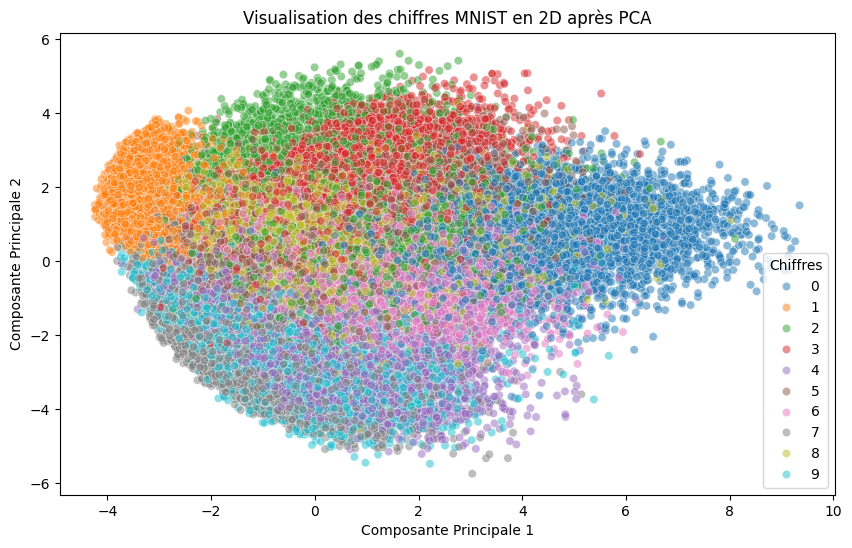

In [6]:

pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=y, palette="tab10", alpha=0.5)
plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.title("Visualisation des chiffres MNIST en 2D après PCA")
plt.legend(title="Chiffres")
plt.show()

## Essai avec autres paramètres

In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Réduction de dimension avec PCA (50 composantes)
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Définir les noyaux et les valeurs de C à tester
noyaux = ['rbf', 'linear']
parametres_C = [0.1, 1, 10, 100]

# Boucle sur les noyaux et les valeurs de C
for kernel in noyaux:
    for C in parametres_C:
        print(f"Test avec kernel={kernel}, C={C}")
        
        # Entraîner le modèle SVM
        svm_model = SVC(kernel=kernel, C=C)
        svm_model.fit(X_train_pca, y_train)
        
        # Prédictions
        y_pred = svm_model.predict(X_test_pca)
        
        # Calcul de l'accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Test Accuracy (SVM après PCA): {accuracy * 100:.2f}%")
        print(classification_report(y_test, y_pred))

# Visualisation des données en 2D après PCA
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=y, palette="tab10", alpha=0.5)
plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")
plt.title("Visualisation des chiffres MNIST en 2D après PCA")
plt.legend(title="Chiffres")
plt.show()

Test avec kernel=rbf, C=0.1
Test Accuracy (SVM après PCA): 96.28%
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1387
           1       0.98      0.99      0.98      1580
           2       0.95      0.96      0.96      1443
           3       0.96      0.94      0.95      1435
           4       0.95      0.97      0.96      1350
           5       0.96      0.96      0.96      1231
           6       0.97      0.98      0.97      1387
           7       0.97      0.96      0.96      1458
           8       0.95      0.96      0.96      1368
           9       0.95      0.93      0.94      1361

    accuracy                           0.96     14000
   macro avg       0.96      0.96      0.96     14000
weighted avg       0.96      0.96      0.96     14000

Test avec kernel=rbf, C=1
Test Accuracy (SVM après PCA): 98.16%
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1387
  

## Conclusion


L'analyse complète de ce code n'a pas eu le temps d'aboutir à cause du temps pris par le calcul de chaque matrice et chaque affichage (environ 10 min par paire de test).
Néanmoins, on peut imaginer que prendre un noyau linéaire au lieu d'un rbf nous donnera des clusters très mal découpé de par la nature du jeu de données où les groupes sont entremélés entre eux.